# Exploratory Data Analysis (EDA)
Basic EDA on the four `.npy` files: **X_train**, **Y_train**, **X_test**, **Y_test**.

## 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.style.use('seaborn-darkgrid')

C:\Users\Ergi Livanaj\AppData\Local\Temp\ipykernel_23504\2790603881.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## 2. Load the data
Adjust the file paths if needed.

In [2]:
X_train = np.load("dc1/data/X_train.npy")
Y_train = np.load("dc1/data/Y_train.npy")
X_test  = np.load("dc1/data/X_test.npy")
Y_test  = np.load("dc1/data/Y_test.npy")
print("Data loaded.")

Data loaded.


## 3. Label distribution
We want to see how many samples there are for each class in both train and test splits.

In [3]:
labels = ["Atelectasis", "Effusion", "Infiltration", "No Finding", "Nodule", "Pneumothorax"]

unique_train, counts_train = np.unique(Y_train, return_counts=True)
unique_test, counts_test = np.unique(Y_test, return_counts=True)

print("== Label Distribution (Train) ==")
for label, count in zip(unique_train, counts_train):
    print(f"{labels[label]}: {count} samples")

print("\n== Label Distribution (Test) ==")
for label, count in zip(unique_test, counts_test):
    print(f"{labels[label]}: {count} samples")


== Label Distribution (Train) ==
Atelectasis: 2521 samples
Effusion: 2318 samples
Infiltration: 2964 samples
No Finding: 6103 samples
Nodule: 1633 samples
Pneumothorax: 1302 samples

== Label Distribution (Test) ==
Atelectasis: 1254 samples
Effusion: 1218 samples
Infiltration: 1537 samples
No Finding: 2924 samples
Nodule: 806 samples
Pneumothorax: 681 samples


## 4. Bar plots for label distribution

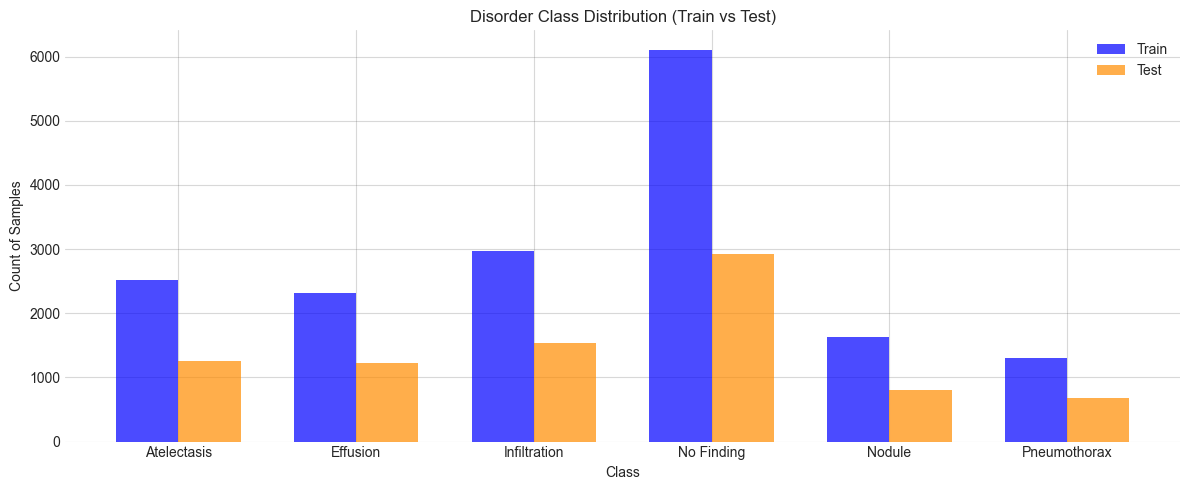

In [4]:
width = 0.35
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 5))
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Customize grid color
ax.grid(color='#404040', linestyle='-', alpha=0.2)

ax.bar(x - width/2, counts_train, width, label='Train', color='blue', alpha=0.7)
ax.bar(x + width/2, counts_test, width, label='Test', color='darkorange', alpha=0.7)

ax.set_title("Disorder Class Distribution (Train vs Test)")
ax.set_xlabel("Class")
ax.set_ylabel("Count of Samples")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.savefig('class_distribution.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()


## 5. Visualizing random samples
Randomly pick some samples from the training set and show them as images.

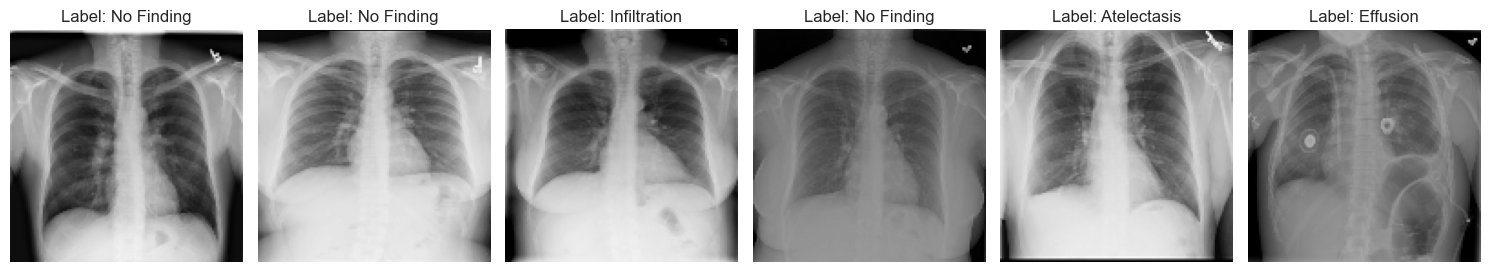

In [5]:
n_samples_to_show = 6
random_indices = random.sample(range(len(X_train)), n_samples_to_show)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices, start=1):
    image = X_train[idx]
    label = Y_train[idx]
    
    plt.subplot(1, n_samples_to_show, i)
    img_to_show = np.squeeze(image, axis=0) if image.ndim == 3 and image.shape[0] == 1 else image
    plt.imshow(img_to_show, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Label: {labels[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## 6. Class-wise average images

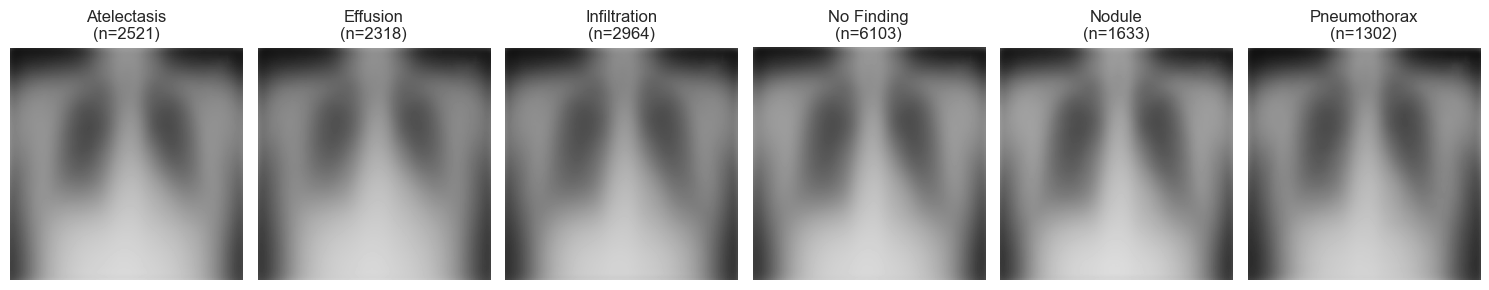

In [6]:
class_averages = []
plt.figure(figsize=(15, 3))

for class_idx in range(len(labels)):
    class_indices = np.where(Y_train == class_idx)[0]
    
    #average image for this class
    class_images = X_train[class_indices]
    avg_image = np.mean(class_images, axis=0)
    
    plt.subplot(1, 6, class_idx + 1)
    plt.imshow(np.squeeze(avg_image), cmap='gray', vmin=0, vmax=255)
    plt.title(f"{labels[class_idx]}\n(n={len(class_indices)})")
    plt.axis('off')
    
    class_averages.append(avg_image)

plt.tight_layout()
plt.show()

## 7. Statistics for each class

C:\Users\Ergi Livanaj\AppData\Local\Temp\ipykernel_23504\3365768565.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
C:\Users\Ergi Livanaj\AppData\Local\Temp\ipykernel_23504\3365768565.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)
C:\Users\Ergi Livanaj\AppData\Local\Temp\ipykernel_23504\3365768565.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels)
C:\Users\Ergi Livanaj\AppData\Local\Temp\ipykernel_23504\3365768565.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels)


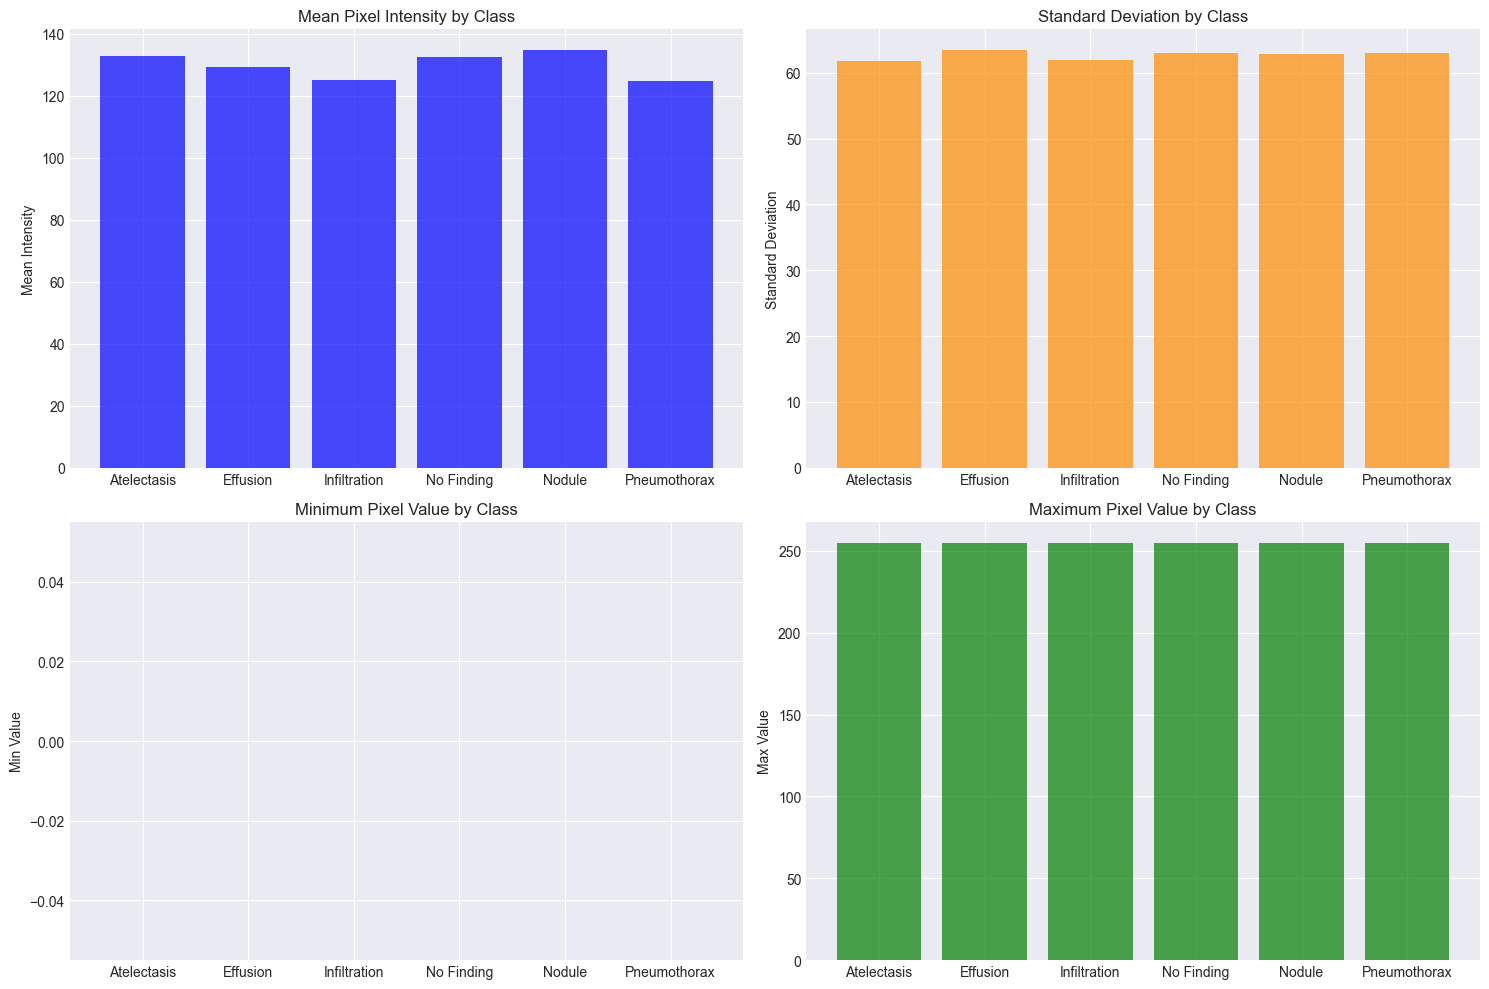

In [7]:
#lists to store statistics
class_stats = []

#statistics for each class
for class_idx in range(len(labels)):
    class_indices = np.where(Y_train == class_idx)[0]
    class_images = X_train[class_indices]
    
    stats = {
        'class': labels[class_idx],
        'mean': class_images.mean(),
        'std': class_images.std(),
        'min': class_images.min(),
        'max': class_images.max()
    }
    class_stats.append(stats)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

#mean values
means = [stat['mean'] for stat in class_stats]
ax1.bar(labels, means, alpha=0.7, color='blue')
ax1.set_title('Mean Pixel Intensity by Class')
ax1.set_xticklabels(labels)
ax1.set_ylabel('Mean Intensity')

#standard deviations
stds = [stat['std'] for stat in class_stats]
ax2.bar(labels, stds, alpha=0.7, color='darkorange')
ax2.set_title('Standard Deviation by Class')
ax2.set_xticklabels(labels)
ax2.set_ylabel('Standard Deviation')

#min values
mins = [stat['min'] for stat in class_stats]
ax3.bar(labels, mins, alpha=0.7, color='red')
ax3.set_title('Minimum Pixel Value by Class')
ax3.set_xticklabels(labels)
ax3.set_ylabel('Min Value')

#max values
maxs = [stat['max'] for stat in class_stats]
ax4.bar(labels, maxs, alpha=0.7, color='green')
ax4.set_title('Maximum Pixel Value by Class')
ax4.set_xticklabels(labels)
ax4.set_ylabel('Max Value')

plt.tight_layout()
plt.show()